# Machine Learning for Time Series Data in Python

## Chapter 1: Time Series and Machine Learning Primer

In [2]:
import os
from glob import glob
import datetime
import itertools
import librosa as lr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.svm import LinearSVC
from sklearn import linear_model

In [3]:
data = pd.read_csv("data.csv", header=0, index_col=0)
data.index.rename("symbol", inplace=True)

print(data.head())
print(data.columns)
print(data.shape)

        data_values
symbol             
0        214.009998
1        214.379993
2        210.969995
3        210.580000
4        211.980005
Index(['data_values'], dtype='object')
(1762, 1)


In [4]:
data2 = pd.read_csv("data2.csv", header=0, index_col=0)

print(data2.head())
print(data2.columns)
print(data2.shape)

   data_values
0    -0.006928
1    -0.007929
2    -0.008900
3    -0.009815
4    -0.010653
Index(['data_values'], dtype='object')
(174980, 1)


        data_values
symbol             
0        214.009998
1        214.379993
2        210.969995
3        210.580000
4        211.980005
   data_values
0    -0.006928
1    -0.007929
2    -0.008900
3    -0.009815
4    -0.010653


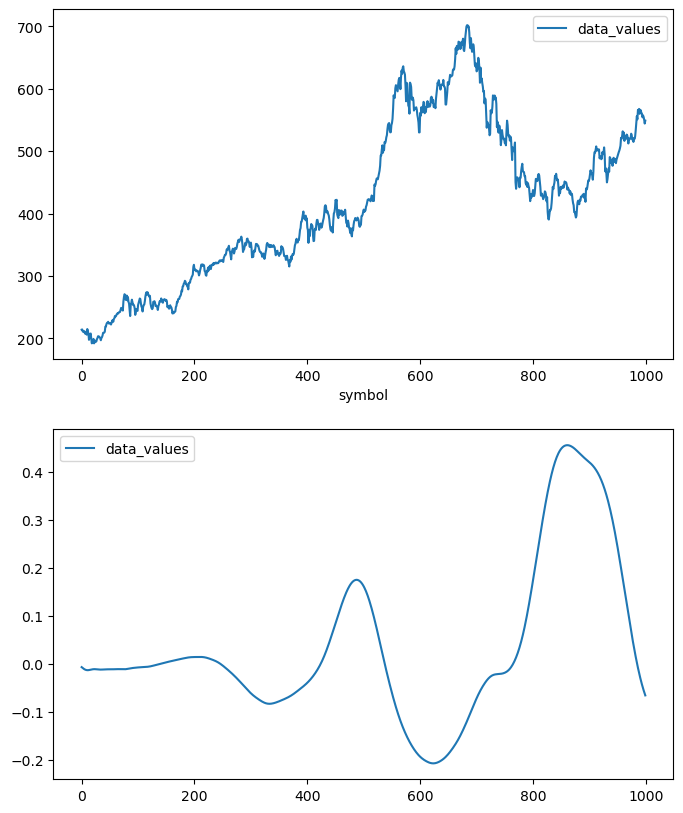

In [5]:
# Print the first 5 rows of data
print(data.head(5))

# Print the first 5 rows of data2
print(data2.head(5))

# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
data.iloc[:1000].plot(y="data_values", ax=axs[0])
data2.iloc[:1000].plot(y="data_values", ax=axs[1])
plt.show()

In [6]:
data = pd.read_csv("data_time.csv", header=0, index_col=0)
data.index.rename("symbol", inplace=True)

print(data.head())
print(data.columns)
print(data.shape)

              time  data_values
symbol                         
0       2010-01-04   214.009998
1       2010-01-05   214.379993
2       2010-01-06   210.969995
3       2010-01-07   210.580000
4       2010-01-08   211.980005
Index(['time', 'data_values'], dtype='object')
(1762, 2)


In [7]:
data2 = pd.read_csv("data_time2.csv", header=0, index_col=0)

print(data2.head())
print(data2.columns)
print(data2.shape)

   data_values      time
0    -0.006928  0.000000
1    -0.007929  0.000045
2    -0.008900  0.000091
3    -0.009815  0.000136
4    -0.010653  0.000181
Index(['data_values', 'time'], dtype='object')
(174980, 2)


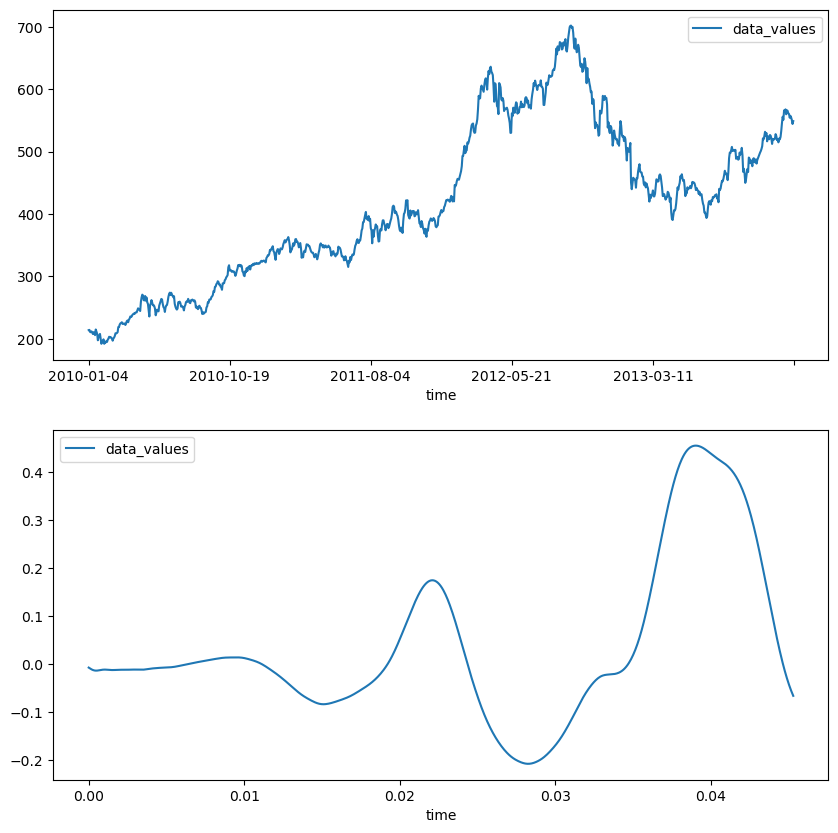

In [8]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
data.iloc[:1000].plot(x="time", y="data_values", ax=axs[0])
data2.iloc[:1000].plot(x="time", y="data_values", ax=axs[1])
plt.show()

In [9]:
iris = sns.load_dataset('iris')
data = iris.iloc[50:].copy()
data["species"] = data["species"].astype("category")
data["target"] = data["species"].cat.codes + 1

data = data.drop(columns="species")

data.columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "target"]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

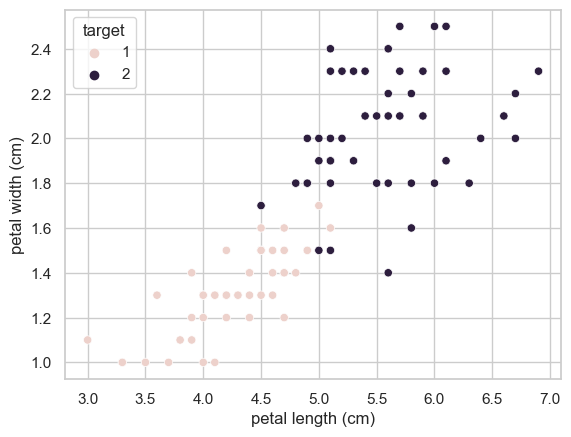

In [10]:
sns.set(style="whitegrid")
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=data)

In [11]:
# Construct data for the model
X = data[["petal length (cm)", "petal width (cm)"]]
y = data[['target']]

# Fit the model
model = LinearSVC()
model.fit(X, y)

C:\Programs\anaconda3\envs\dc-librosa\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Programs\anaconda3\envs\dc-librosa\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [12]:
idx_targets = [116, 142, 148, 67, 133, 107, 136, 147, 146, 97, 123, 82, 96, 146, 75, 133, 128, 86, 146, 130]
targets = data.loc[idx_targets]
targets

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
116,6.5,3.0,5.5,1.8,2
142,5.8,2.7,5.1,1.9,2
148,6.2,3.4,5.4,2.3,2
67,5.8,2.7,4.1,1.0,1
133,6.3,2.8,5.1,1.5,2
107,7.3,2.9,6.3,1.8,2
136,6.3,3.4,5.6,2.4,2
147,6.5,3.0,5.2,2.0,2
146,6.3,2.5,5.0,1.9,2
97,6.2,2.9,4.3,1.3,1


[2 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2]


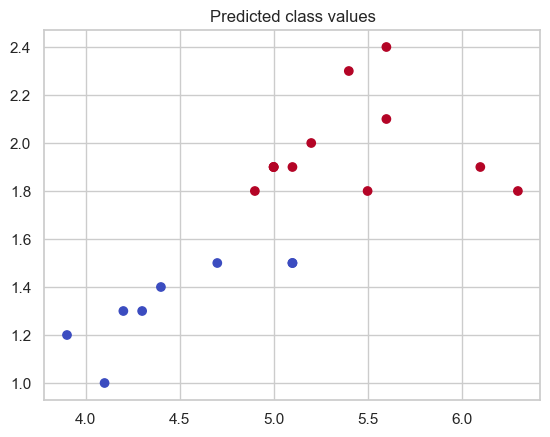

In [13]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

In [14]:
california_housing = fetch_california_housing(as_frame=True)

housing = california_housing.frame.copy()
housing.shape

(20640, 9)

<Axes: xlabel='HouseAge', ylabel='AveRooms'>

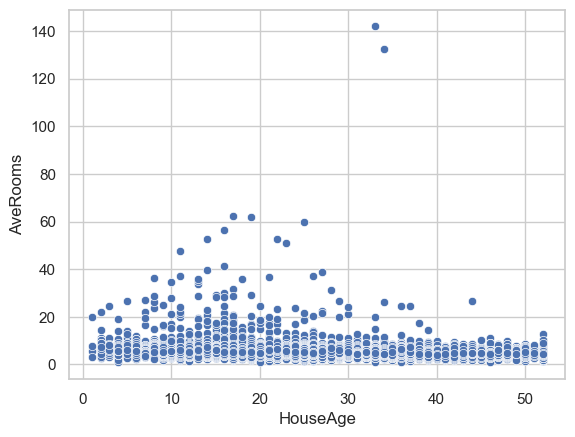

In [15]:
sns.set(style="whitegrid")
sns.scatterplot(x="HouseAge", y="AveRooms", data=housing)

In [16]:
# Prepare input and output DataFrames
X = housing[["MedHouseVal"]]
y = housing[["AveRooms"]]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

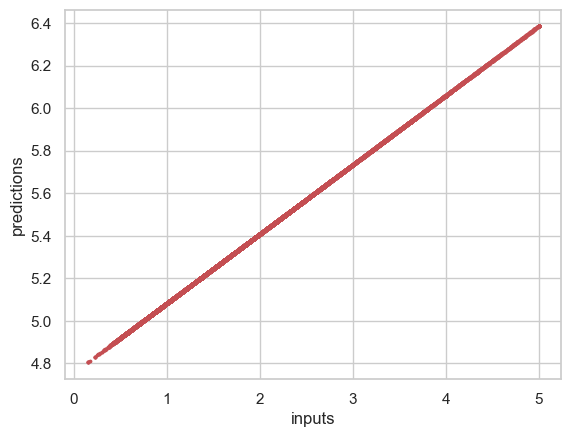

In [17]:
new_inputs = housing[["MedHouseVal"]]

# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs)

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

In [18]:
# List all the wav files in the folder
data_dir = r"D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a"
all_audio_files = glob(data_dir + r"/*.wav")

df_audio_files = pd.DataFrame(all_audio_files, columns=["full_path"])

df_audio_files["file_name"] = df_audio_files["full_path"].apply(os.path.basename)
df_audio_files["prefix"] = df_audio_files["file_name"].str.extract(r"^(.*)__.*.wav")
df_audio_files["date_time_string"] = df_audio_files["file_name"].str.extract(r".*__(\d*).wav")
df_audio_files["date_time"] = pd.to_datetime(df_audio_files["date_time_string"], format="%Y%m%d%H%M")
                                
df_audio_files

,full_path,file_name,prefix,date_time_string,date_time
0,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,artifact__201012172012.wav,artifact,201012172012,2010-12-17 20:12:00
1,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,artifact__201105040918.wav,artifact,201105040918,2011-05-04 09:18:00
2,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,artifact__201105041959.wav,artifact,201105041959,2011-05-04 19:59:00
3,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,artifact__201105051017.wav,artifact,201105051017,2011-05-05 10:17:00
4,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,artifact__201105060108.wav,artifact,201105060108,2011-05-06 01:08:00
...,...,...,...,...,...
171,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201106221450.wav,normal,201106221450,2011-06-22 14:50:00
172,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201108011112.wav,normal,201108011112,2011-08-01 11:12:00
173,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201108011114.wav,normal,201108011114,2011-08-01 11:14:00
174,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201108011115.wav,normal,201108011115,2011-08-01 11:15:00


In [19]:
df_normal_murmur = df_audio_files[df_audio_files["prefix"].str.contains("normal|murmur")].copy()
df_normal_murmur

,full_path,file_name,prefix,date_time_string,date_time
111,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201101051104.wav,murmur,201101051104,2011-01-05 11:04:00
112,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201101051108.wav,murmur,201101051108,2011-01-05 11:08:00
113,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201101051114.wav,murmur,201101051114,2011-01-05 11:14:00
114,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201101180902.wav,murmur,201101180902,2011-01-18 09:02:00
115,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201102051443.wav,murmur,201102051443,2011-02-05 14:43:00
...,...,...,...,...,...
171,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201106221450.wav,normal,201106221450,2011-06-22 14:50:00
172,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201108011112.wav,normal,201108011112,2011-08-01 11:12:00
173,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201108011114.wav,normal,201108011114,2011-08-01 11:14:00
174,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201108011115.wav,normal,201108011115,2011-08-01 11:15:00


In [20]:
mask = (
    (df_audio_files["date_time"] >= datetime.datetime(2011, 1, 7, 5, 38)) 
    &
    (df_audio_files["date_time"] <= datetime.datetime(2011, 3, 10, 11, 40))
    &
    (df_audio_files["prefix"].str.contains("normal"))
)
df_normal = df_audio_files.loc[mask].copy()

df_normal

,full_path,file_name,prefix,date_time_string,date_time
145,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201101070538.wav,normal,201101070538,2011-01-07 05:38:00
146,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201101151127.wav,normal,201101151127,2011-01-15 11:27:00
147,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201102081152.wav,normal,201102081152,2011-02-08 11:52:00
148,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201102081321.wav,normal,201102081321,2011-02-08 13:21:00
149,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201102201230.wav,normal,201102201230,2011-02-20 12:30:00
150,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201102260502.wav,normal,201102260502,2011-02-26 05:02:00
151,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201102270940.wav,normal,201102270940,2011-02-27 09:40:00
152,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201103090635.wav,normal,201103090635,2011-03-09 06:35:00
153,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201103101140.wav,normal,201103101140,2011-03-10 11:40:00


In [21]:
mask = (
    (df_audio_files["date_time"] >= datetime.datetime(2011, 8, 22, 22, 38)) 
    &
    (df_audio_files["date_time"] <= datetime.datetime(2011, 8, 22, 22, 58))
    &
    (df_audio_files["prefix"].str.contains("murmur"))
)
df_murmur = df_audio_files.loc[mask].copy()

df_murmur

,full_path,file_name,prefix,date_time_string,date_time
133,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201108222238.wav,murmur,201108222238,2011-08-22 22:38:00
134,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201108222242.wav,murmur,201108222242,2011-08-22 22:42:00
135,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201108222243.wav,murmur,201108222243,2011-08-22 22:43:00
136,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201108222245.wav,murmur,201108222245,2011-08-22 22:45:00
137,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201108222246.wav,murmur,201108222246,2011-08-22 22:46:00
138,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201108222248.wav,murmur,201108222248,2011-08-22 22:48:00
139,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201108222251.wav,murmur,201108222251,2011-08-22 22:51:00
140,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201108222252.wav,murmur,201108222252,2011-08-22 22:52:00
141,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201108222253.wav,murmur,201108222253,2011-08-22 22:53:00
142,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201108222255.wav,murmur,201108222255,2011-08-22 22:55:00


In [22]:
list_files = [df_murmur["full_path"].to_list(), df_normal["full_path"].to_list()]


audio_files = list(itertools.chain.from_iterable(list_files))
print(len(audio_files))
audio_files

21


['D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201108222238.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201108222242.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201108222243.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201108222245.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201108222246.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201108222248.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201108222251.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201108222252.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201108222253.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201108222255.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201108222256.wav',
 'D:/GitHub/data-sets

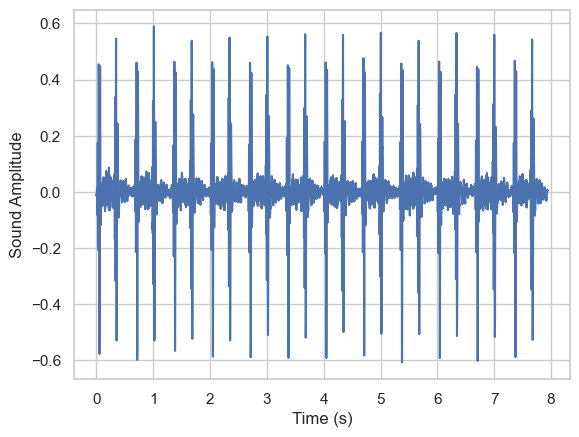

In [23]:
# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

In [32]:
df_prices = pd.read_csv("prices.csv", index_col=0)

mask = (
    (df_prices["symbol"].str.contains("AAPL|FB|NFLX|V|XOM"))
)
df_data = df_prices.loc[mask].reset_index()
df_data

,date,symbol,close,volume
0,2010-01-04,AAPL,214.009998,123432400.0
1,2010-01-04,NFLX,53.479999,17239600.0
2,2010-01-04,NVDA,18.490000,20005100.0
3,2010-01-04,V,88.139999,20180000.0
4,2010-01-04,VZ,33.279869,16176600.0
...,...,...,...,...
11575,2016-12-30,NFLX,123.800003,4426500.0
11576,2016-12-30,NVDA,106.739998,30246000.0
11577,2016-12-30,V,78.019997,6709200.0
11578,2016-12-30,VZ,53.380001,12440800.0


In [33]:
df_pivot = df_data.pivot(index="date", columns="symbol", values="close")
df_pivot

symbol,AAPL,FB,NFLX,NVDA,V,VZ,XOM
date,,,,,,,
2010-01-04,214.009998,NaN,53.479999,18.490000,88.139999,33.279869,69.150002
2010-01-05,214.379993,NaN,51.510001,18.760000,87.129997,33.339868,69.419998
2010-01-06,210.969995,NaN,53.319999,18.879999,85.959999,31.919873,70.019997
2010-01-07,210.580000,NaN,52.400001,18.510000,86.760002,31.729875,69.800003
2010-01-08,211.980005,NaN,53.300002,18.549999,87.000000,31.749874,69.519997
...,...,...,...,...,...,...,...
2016-12-23,116.519997,117.269997,125.589996,109.779999,78.150002,53.680000,90.709999
2016-12-27,117.260002,118.010002,128.350006,117.320000,78.349998,53.639999,90.750000
2016-12-28,116.760002,116.919998,125.889999,109.250000,78.300003,53.439999,90.300003


symbol            AAPL  FB       NFLX       NVDA          V         VZ  \
date                                                                     
2010-01-04  214.009998 NaN  53.479999  18.490000  88.139999  33.279869   
2010-01-05  214.379993 NaN  51.510001  18.760000  87.129997  33.339868   
2010-01-06  210.969995 NaN  53.319999  18.879999  85.959999  31.919873   
2010-01-07  210.580000 NaN  52.400001  18.510000  86.760002  31.729875   
2010-01-08  211.980005 NaN  53.300002  18.549999  87.000000  31.749874   

symbol            XOM  
date                   
2010-01-04  69.150002  
2010-01-05  69.419998  
2010-01-06  70.019997  
2010-01-07  69.800003  
2010-01-08  69.519997  


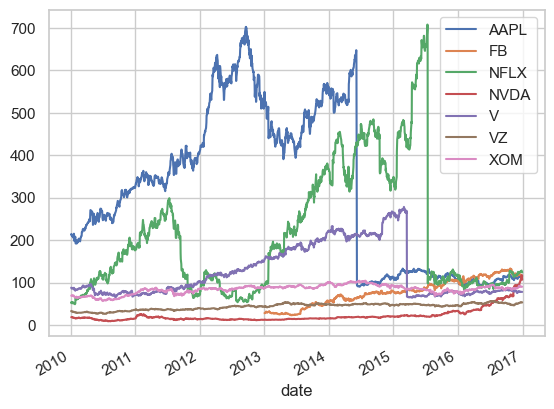

In [34]:
data = df_pivot.copy()
# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()